In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [10]:
df_cases = pd.read_csv('../../data/external/pandemic/owid-covid-data_US.csv', parse_dates=['date'])
df_cases_USA = df_cases.query('iso_code == "USA"')
df_cases_USA = df_cases_USA[['date', 'new_cases', 'new_cases_smoothed']]
df_cases_USA = df_cases_USA[df_cases_USA['date'] <= datetime.fromisoformat('2022-02-03')]
df_cases_USA.tail()

,date,new_cases,new_cases_smoothed
170806,2022-01-30,197945.0,505146.857
170807,2022-01-31,542235.0,450895.571
170808,2022-02-01,325402.0,426931.571
170809,2022-02-02,329513.0,384860.000
170810,2022-02-03,274798.0,351792.143


In [3]:
df_cases.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
180516,ZWE,Africa,Zimbabwe,2022-04-16,247237.0,0.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180517,ZWE,Africa,Zimbabwe,2022-04-17,247278.0,41.0,45.714,5463.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180518,ZWE,Africa,Zimbabwe,2022-04-18,247297.0,19.0,41.000,5464.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180519,ZWE,Africa,Zimbabwe,2022-04-19,247297.0,0.0,29.000,5464.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
180520,ZWE,Africa,Zimbabwe,2022-04-20,247336.0,39.0,25.143,5466.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df_trends = pd.read_csv('../../data/processed/gt.csv', parse_dates=['date'])
df_trends.tail()

,date,.m.01cpyy,.m.07__7,.g.11j8_9sv06,.g.11j8qdq0kc,.g.121jyvn6,.m.02qbqx,.m.01b_06,.g.11mtd7fx1k,.m.040499,...,.m.012nkvyf,.m.05p4526,.m.0k9sx,.m.05zdp,.m.012sj0,.m.02cm61,.m.0dxh1,.m.06mqr,.m.02z7r3z,.m.03v6hq
760,2022-01-30,31.772674,397.909378,221.801801,22474.481488,94.208271,52.618175,72.818699,15645.793162,104.179150,...,142.944303,42668.943863,56.836547,56.444281,77.959373,50.706947,142.568199,67.988604,185.100209,84.997671
761,2022-01-31,32.359823,511.710689,301.788372,25139.162579,109.679452,55.286081,74.131430,16633.361274,96.079195,...,133.877521,3710.618070,97.232893,51.672509,81.973442,76.653835,170.503391,77.067932,158.108702,76.503041
762,2022-02-01,31.189961,502.287011,282.808977,22613.124279,105.405192,54.948553,71.248073,13707.271772,91.369150,...,118.990040,10602.449719,95.438429,53.566258,90.008464,77.559362,144.972124,65.096173,129.942728,79.722646
763,2022-02-02,33.318872,507.355586,293.854974,0.000000,104.009793,53.297020,73.418301,0.000000,97.707360,...,138.951477,28886.427009,0.000000,55.497539,87.666654,72.199312,142.918597,70.222536,123.435024,64.834975
764,2022-02-03,32.084839,468.566367,278.998336,0.000000,101.698465,50.675855,68.235833,0.000000,91.676041,...,137.488830,16156.815107,0.000000,49.044336,86.570821,74.387170,156.529892,73.963926,110.209843,67.032771


In [5]:
tags = [
    "/m/01cpyy", # Coronavirus (Virus)
    "/m/01b_06", # Symptom (Topic)
    "/m/07kfjfg", # Airborne transmission (Disease)
    
    "/m/0dsdr32", # Travel warning (Topic)
    "/m/05zdp", # Public transport (Transit service type)
    "/m/012sj0", # Hygiene (Topic)

    "/m/07__7", # Vaccine (Topic)
    "/m/0dxh1", # Emergency medical services (Medical specialty)
    "/m/0119h9rd", # Rapid diagnostic test (Topic)
]
labels = [
    "Coronavirus",
    "Symptom",
    "Airborne transmission",
    
    "Travel warning",
    "Public transport",
    "Hygiene",
    
    "Vaccine",
    "Emergency medical services",
    "Rapid diagnostic test"
]

In [6]:
waves = [
    ("2020-04-07", "2020-04-17", "First wave", "tab:blue"),
    ("2020-07-14", "2020-07-22", "Second wave", "yellow"),
    ("2020-11-20", "2021-01-08", "Third wave", "tab:orange"),
    ("2021-09-01", "2021-09-07", "Fourth wave", "tab:pink"),
    ("2022-01-15", "2022-02-03", "Fifth wave", "tab:purple"),
]

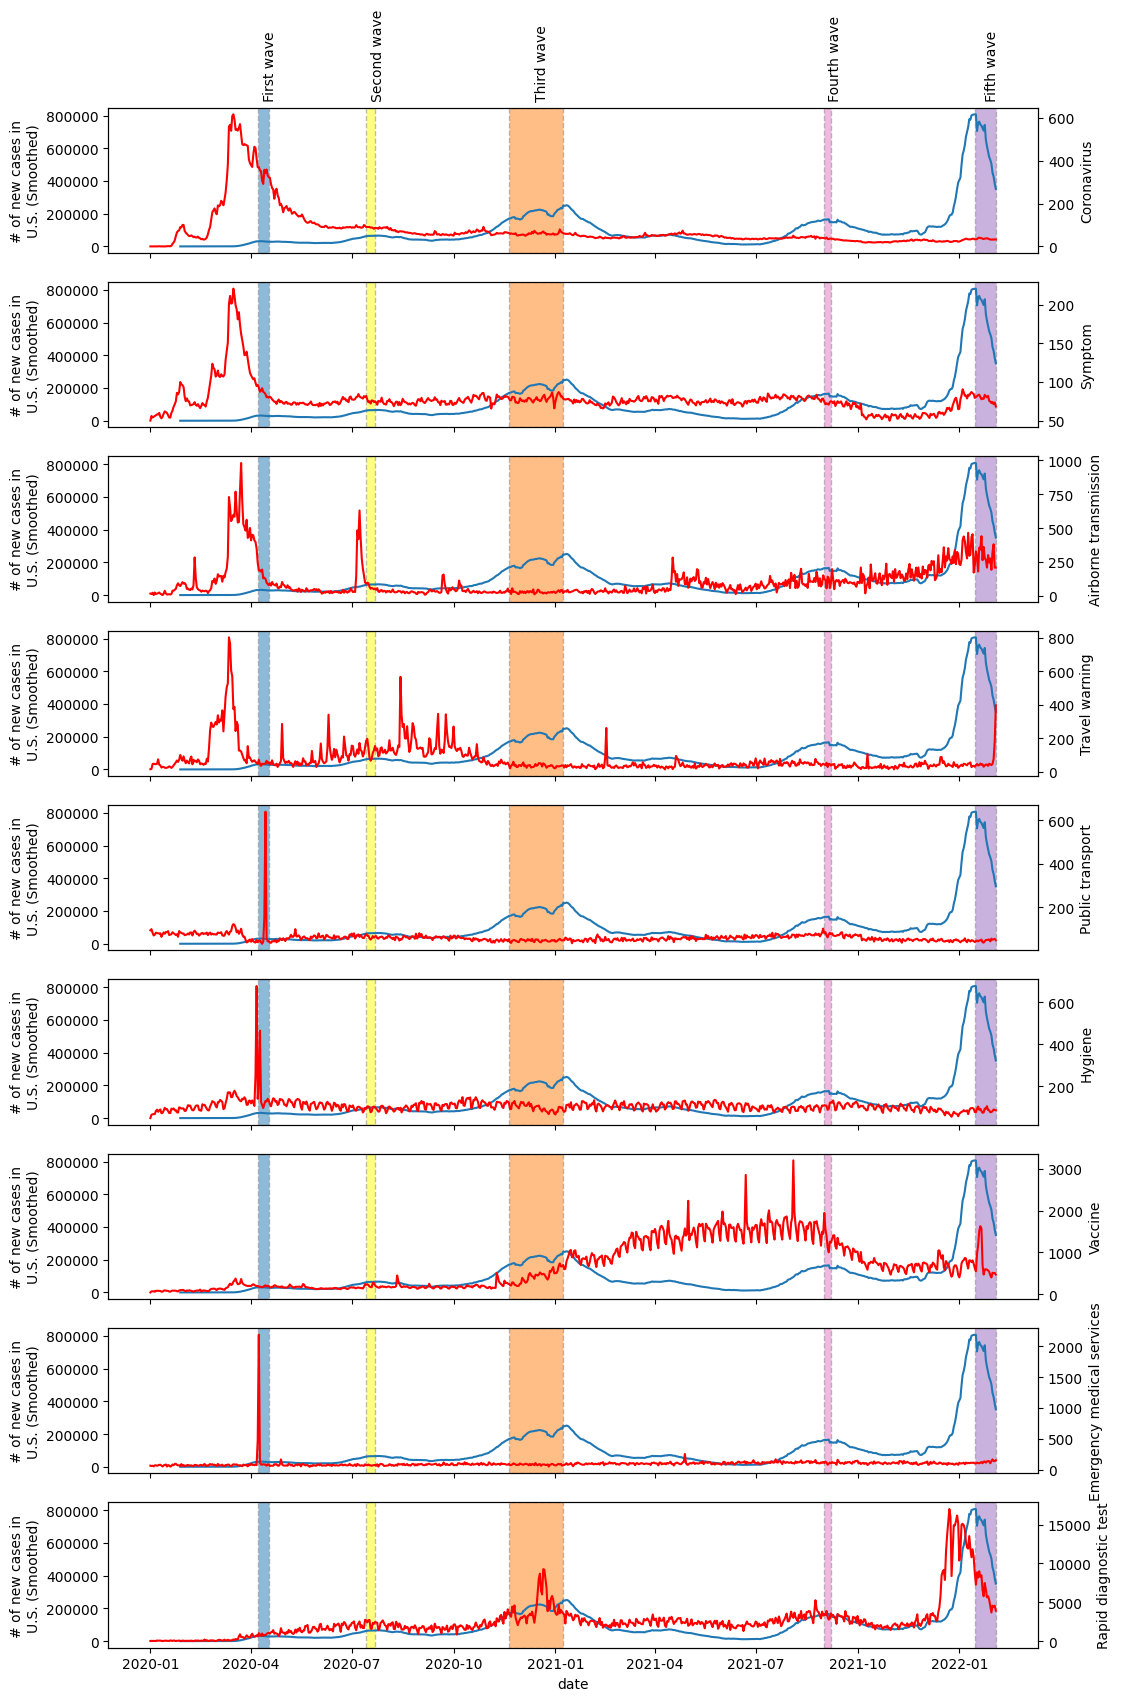

In [11]:
fig, axes = plt.subplots(nrows=9, sharex='all', figsize=(12, 20))

for index in range(9):
    current_column = tags[index]
    current_column = current_column.replace("/", ".")
    current_label = labels[index]

    ax2 = axes[index].twinx()
    
    ax2.set_ylabel(current_label)
    axes[index].set_ylabel('# of new cases in\nU.S. (Smoothed)')

    sns.lineplot(data = df_trends, x = 'date', y = current_column, ax=ax2, color="r")
    # sns.lineplot(data = df_cases_USA, x = "date", y = "new_cases", ax=axes[index])
    sns.lineplot(data = df_cases_USA, x = "date", y = "new_cases_smoothed", ax=axes[index])

    for wave in waves:
        (wave_start, wave_end, label, color) = wave

        wave_start = date.fromisoformat(wave_start)
        wave_end = date.fromisoformat(wave_end)

        axes[index].axvspan(
            xmin = wave_start, xmax = wave_end, 
            edgecolor="grey", linestyle="--", facecolor=color, alpha=0.5
        )

        if index == 0:
            adj_x = wave_start + ((wave_end - wave_start) / 2)
            adj_y = df_trends.iloc[:, 1].max()

            ax2.annotate(
                " " * 3 + label, rotation=90,
                xy=(adj_x, adj_y),
                xycoords = 'data',
                horizontalalignment='left', verticalalignment='bottom'
            )

plt.savefig('../../graphs/Figure02_Merged-GT_vs_USCases.Selected9.pdf', bbox_inches='tight')
plt.savefig('../../graphs/Figure02_Merged-GT_vs_USCases.Selected9.png', bbox_inches='tight')
plt.show()